Bagging Regressor Results:
Training R² Score: 0.9346956491782403
Testing R² Score: 0.5413601317697532
Training RMSE: 0.8152891562267952
Testing RMSE: 2.2686337656570807


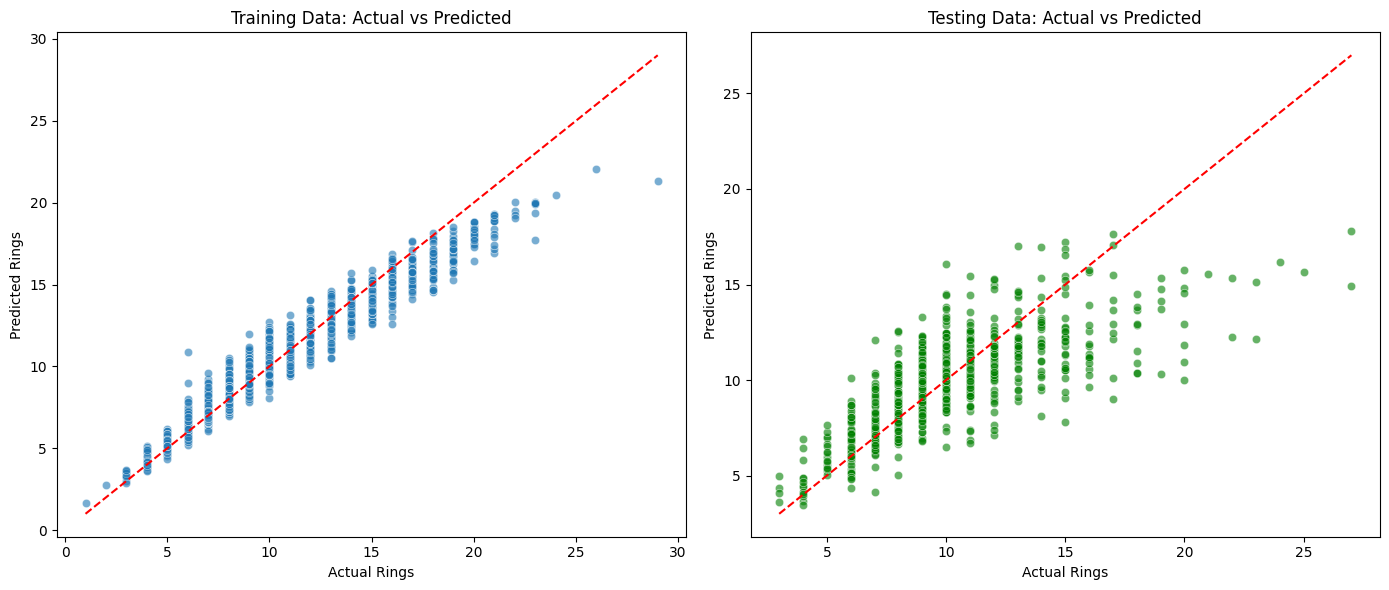

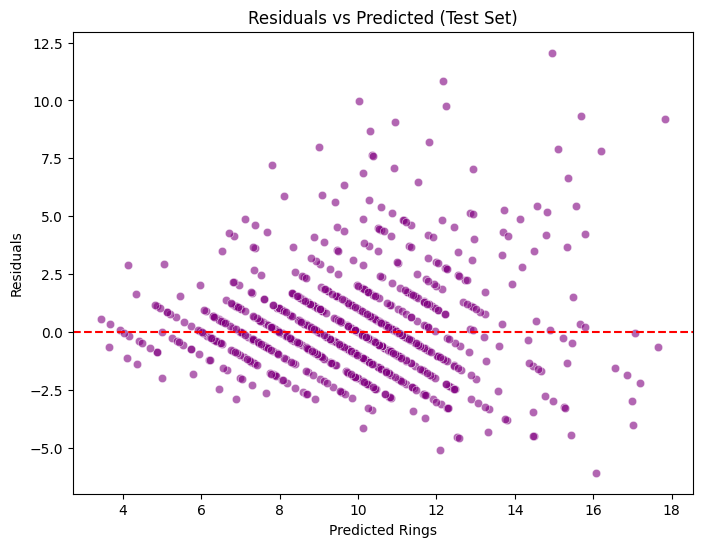

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  

# Load the dataset
df = pd.read_csv("abalone.csv")

# Drop the 'Sex' column (categorical)
df = df.drop('Sex', axis=1)

# Define features and target
X = df.drop(["Rings"], axis=1)
y = df["Rings"].values

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

base_model = DecisionTreeRegressor()
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=100, random_state=7)
bagging_model.fit(x_train, y_train)

# Predictions
y_pred_train_bag = bagging_model.predict(x_train)
y_pred_test_bag = bagging_model.predict(x_test)

# Evaluation
r2_train_bag = r2_score(y_train, y_pred_train_bag)
r2_test_bag = r2_score(y_test, y_pred_test_bag)
rmse_train_bag = sqrt(mean_squared_error(y_train, y_pred_train_bag))
rmse_test_bag = sqrt(mean_squared_error(y_test, y_pred_test_bag))

print("Bagging Regressor Results:")
print("Training R² Score:", r2_train_bag)
print("Testing R² Score:", r2_test_bag)
print("Training RMSE:", rmse_train_bag)
print("Testing RMSE:", rmse_test_bag)

# ---------------------------
#        Visualization
# ---------------------------

# 1. Predicted vs Actual for Training and Testing
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train_bag, alpha=0.6)
plt.title("Training Data: Actual vs Predicted")
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test_bag, alpha=0.6, color='green')
plt.title("Testing Data: Actual vs Predicted")
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()

# 2. Residual Plot (Testing)
residuals = y_test - y_pred_test_bag

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_bag, y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Test Set)")
plt.xlabel("Predicted Rings")
plt.ylabel("Residuals")
plt.show()


In [3]:
# Additional metrics
from sklearn.metrics import mean_squared_error

# MSE
mse_train_bag = mean_squared_error(y_train, y_pred_train_bag)
mse_test_bag = mean_squared_error(y_test, y_pred_test_bag)

# Custom "accuracy" (within ±1 of true value)
train_accuracy = np.mean(np.abs(y_train - y_pred_train_bag) <= 1)
test_accuracy = np.mean(np.abs(y_test - y_pred_test_bag) <= 1)

# Display Results
print("Bagging Regressor Results:")
print(f"Training R² Score: {r2_train_bag:.4f}")
print(f"Testing R² Score: {r2_test_bag:.4f}")
print(f"Training MSE: {mse_train_bag:.4f}")
print(f"Testing MSE: {mse_test_bag:.4f}")
print(f"Training RMSE: {rmse_train_bag:.4f}")
print(f"Testing RMSE: {rmse_test_bag:.4f}")
print(f"Training Accuracy (±1 tolerance): {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy (±1 tolerance): {test_accuracy * 100:.2f}%")


Bagging Regressor Results:
Training R² Score: 0.9347
Testing R² Score: 0.5414
Training MSE: 0.6647
Testing MSE: 5.1467
Training RMSE: 0.8153
Testing RMSE: 2.2686
Training Accuracy (±1 tolerance): 84.29%
Testing Accuracy (±1 tolerance): 48.21%
